<a href="https://colab.research.google.com/github/rashmidubey2410/IMDB-Movie-Review-Sentiment-Classification-using-RNN---LSTM/blob/master/IMDB_Review_Classification_using_RNN_LSTM_Base_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using LSTM 

**1) Load in and visualize the data**

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Download and set up data**

In [21]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)

In [22]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [23]:
x_train.shape,x_test.shape


((25000,), (25000,))

In [24]:
x_train=pad_sequences(x_train,maxlen=100)
x_test=pad_sequences(x_test,maxlen=100)

In [25]:
x_train.shape,x_test.shape

((25000, 100), (25000, 100))

In [26]:
vocab_size=20000
embed_size=128

**Build Model**

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding

In [28]:
model=Sequential()
model.add(Embedding(vocab_size,embed_size,input_shape=(x_train.shape[1],)))
model.add(LSTM(units=100,activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,651,701
Trainable params: 2,651,701
Non-trainable params: 0
_________________________________________________________________


In [31]:
history=model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
196/196 [==============================] - 75s 380ms/step - loss: 0.4228 - accuracy: 0.7958 - val_loss: 0.3409 - val_accuracy: 0.8525
Epoch 2/5
196/196 [==============================] - 74s 380ms/step - loss: 0.2319 - accuracy: 0.9108 - val_loss: 0.3593 - val_accuracy: 0.8478
Epoch 3/5
196/196 [==============================] - 75s 383ms/step - loss: 0.1537 - accuracy: 0.9441 - val_loss: 0.3971 - val_accuracy: 0.8401
Epoch 4/5
196/196 [==============================] - 75s 382ms/step - loss: 0.1016 - accuracy: 0.9656 - val_loss: 0.5722 - val_accuracy: 0.8272
Epoch 5/5
196/196 [==============================] - 74s 377ms/step - loss: 0.0694 - accuracy: 0.9770 - val_loss: 0.5955 - val_accuracy: 0.8282


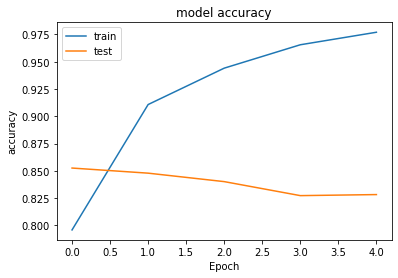

In [33]:
# plot training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

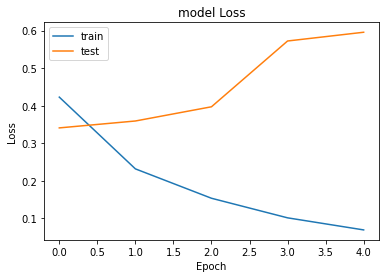

In [34]:
# plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [36]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.82%
